# coffee sales


In [10]:
print("Hello, Coffee!")

Hello, Coffee!


# ☕ Kick Off My Coffee Journey! ☕
Hooray, I am about to run my very own coffee shop in a notebook! 🎉 I am the boss, serving yummy lattes and espressos. I am going to make a pretend list of coffee sales, draw super cool pictures, and even guess how many coffees I'll sell later. Lets Go!!! 🚀

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set a random seed so we get the same data each time
np.random.seed(42)

# Create dates for one year
start_date = datetime(2024, 1, 1)
dates = [start_date + timedelta(days=x) for x in range(365)]

# Make 1000 sales
data = {
    'Date': [random.choice(dates) for _ in range(1000)],
    'Coffee_Type': [random.choice(['Latte', 'Cappuccino', 'Espresso', 'Americano']) for _ in range(1000)],
    'Price': [random.choice([3.5, 4.0, 2.5, 3.0]) for _ in range(1000)],
    'Customer_ID': [random.randint(1, 200) for _ in range(1000)],
    'Location': [random.choice(['Downtown', 'Mall', 'Campus']) for _ in range(1000)]
}

# Put data in a table
df = pd.DataFrame(data)

# Save it to a file
df.to_csv('coffee_sales.csv', index=False)

# Show the first few rows
print(df.head())

        Date Coffee_Type  Price  Customer_ID  Location
0 2024-12-18  Cappuccino    3.5           52    Campus
1 2024-04-26   Americano    3.5           68  Downtown
2 2024-01-13    Espresso    4.0           44      Mall
3 2024-06-11    Espresso    3.0          175      Mall
4 2024-10-27    Espresso    3.5           75      Mall



# 📖 My Coffee Shop’s Secret Story! 📖
Wow, I just made a giant list of 1000 coffee sales! 🌟 It’s like writing a story about who’s buying cappuccinos and americanos at my shop. This pretend data is my treasure map, and now I’ll check if it’s neat and tidy before drawing awesome pictures. Let’s be coffee detectives! 🕵️‍♂️

In [2]:
print(df.isnull().sum())

Date           0
Coffee_Type    0
Price          0
Customer_ID    0
Location       0
dtype: int64


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()
print(df.head())

        Date Coffee_Type  Price  Customer_ID  Location Day_of_Week
0 2024-12-18  Cappuccino    3.5           52    Campus   Wednesday
1 2024-04-26   Americano    3.5           68  Downtown      Friday
2 2024-01-13    Espresso    4.0           44      Mall    Saturday
3 2024-06-11    Espresso    3.0          175      Mall     Tuesday
4 2024-10-27    Espresso    3.5           75      Mall      Sunday


# Sparkly Clean Data, Ready for Fun! 
I am a cleaning superhero!  My coffee sales list is now super neat, like a shiny coffee cup. I even added the days of the week to see if Fridays are latte party days! Next, I’ll make colorful charts to discover which coffees are the biggest hits. Get ready to draw! 

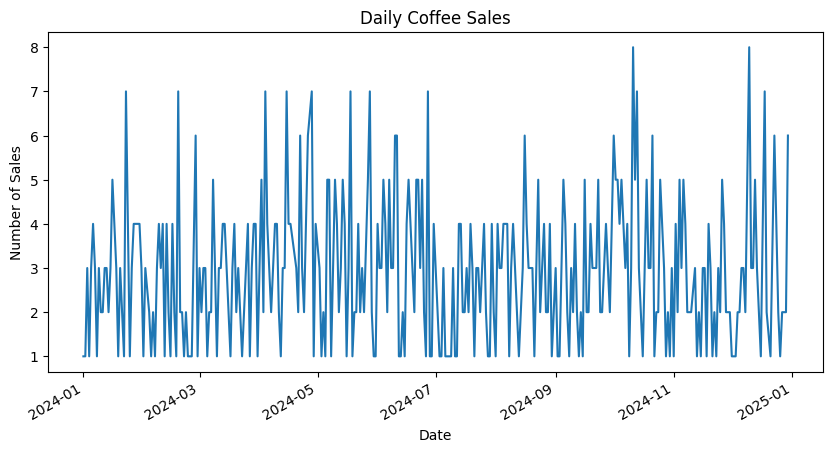

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sales by date
daily_sales = df.groupby('Date').size()

# Make a line picture
plt.figure(figsize=(10, 5))
daily_sales.plot()
plt.title('Daily Coffee Sales')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()

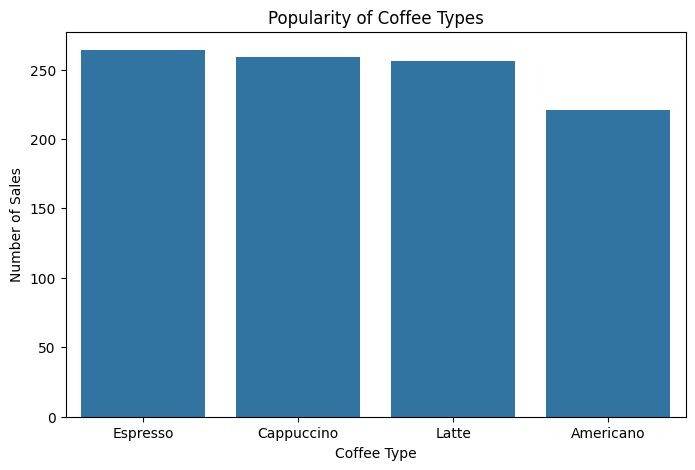

In [5]:
coffee_counts = df['Coffee_Type'].value_counts()

# Make a bar picture
plt.figure(figsize=(8, 5))
sns.barplot(x=coffee_counts.index, y=coffee_counts.values)
plt.title('Popularity of Coffee Types')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Sales')
plt.show()

# My Coffee Charts Are Superstars! 
Look at those amazing charts!  The wiggly line is like a roller coaster showing how many coffees I sell each day, and the colorful bars tell us which coffee is the champion—Latte or Espresso? I am like an artist painting my coffee shop’s story! Now, let’s guess what happens next with a magic trick! 

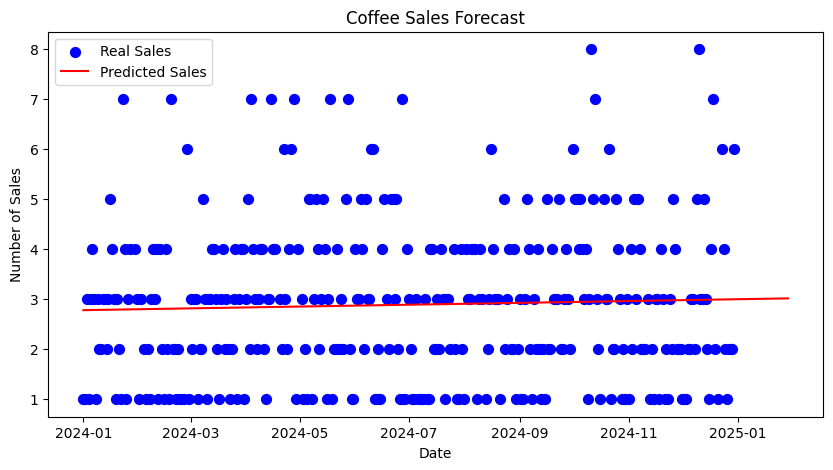

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import timedelta

# Count sales by date
daily_sales = df.groupby('Date').size().reset_index(name='y')
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Turn dates into numbers (days since start)
start_date = daily_sales['Date'].min()
daily_sales['Days'] = (daily_sales['Date'] - start_date).dt.days

# Prepare data for our magic line
X = daily_sales['Days'].values.reshape(-1, 1)  # Days as input
y = daily_sales['y'].values  # Sales as output

# Make the prediction model
model = LinearRegression()
model.fit(X, y)

# Predict for past days and next 30 days
future_days = np.array(range(daily_sales['Days'].max() + 1, daily_sales['Days'].max() + 31)).reshape(-1, 1)
all_days = np.concatenate([X, future_days])
predictions = model.predict(all_days)

# Make dates for future predictions
all_dates = [start_date + timedelta(days=int(day)) for day in all_days.flatten()]

# Draw the picture
plt.figure(figsize=(10, 5))
plt.scatter(daily_sales['Date'], daily_sales['y'], color='blue', label='Real Sales', s=50)
plt.plot(all_dates, predictions, color='red', label='Predicted Sales')
plt.title('Coffee Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.legend()
plt.show()